<a href="https://colab.research.google.com/github/ritwiks9635/My_priject_file_5/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset = https://www.kaggle.com/datasets/ ashishjangra27/face-mask-12k-images-dataset

Unzip dataset

In [ ]:
from zipfile import ZipFile
data = "/content/https:/www.kaggle.com/datasets/andrewmvd/face-mask-detection/face-mask-detection .zip"
with ZipFile(data,"r") as zip:
  zip.extractall()
  print("the data has been extracted ")

the data has been extracted 


Import require model

In [ ]:
import numpy as np 
import pandas as pd 
import cv2
from scipy.spatial import distance

Load cv2 Cascade classifier

In [ ]:
# Cascade classifiers are trained using
# several positive (with faces or objects)
# images and arbitrary negative (without faces
# or objects) images.

In [ ]:
face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

show some inages

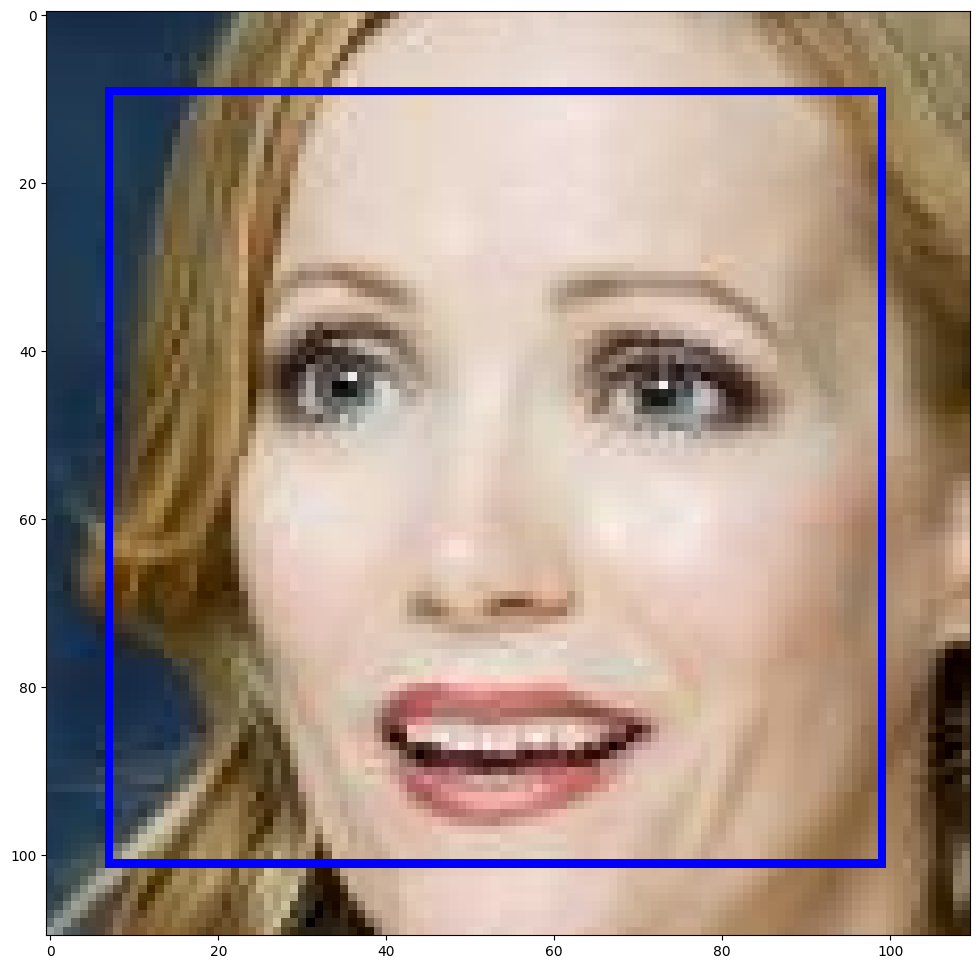

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/Face Mask Dataset/Train/WithoutMask/1119.png')
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

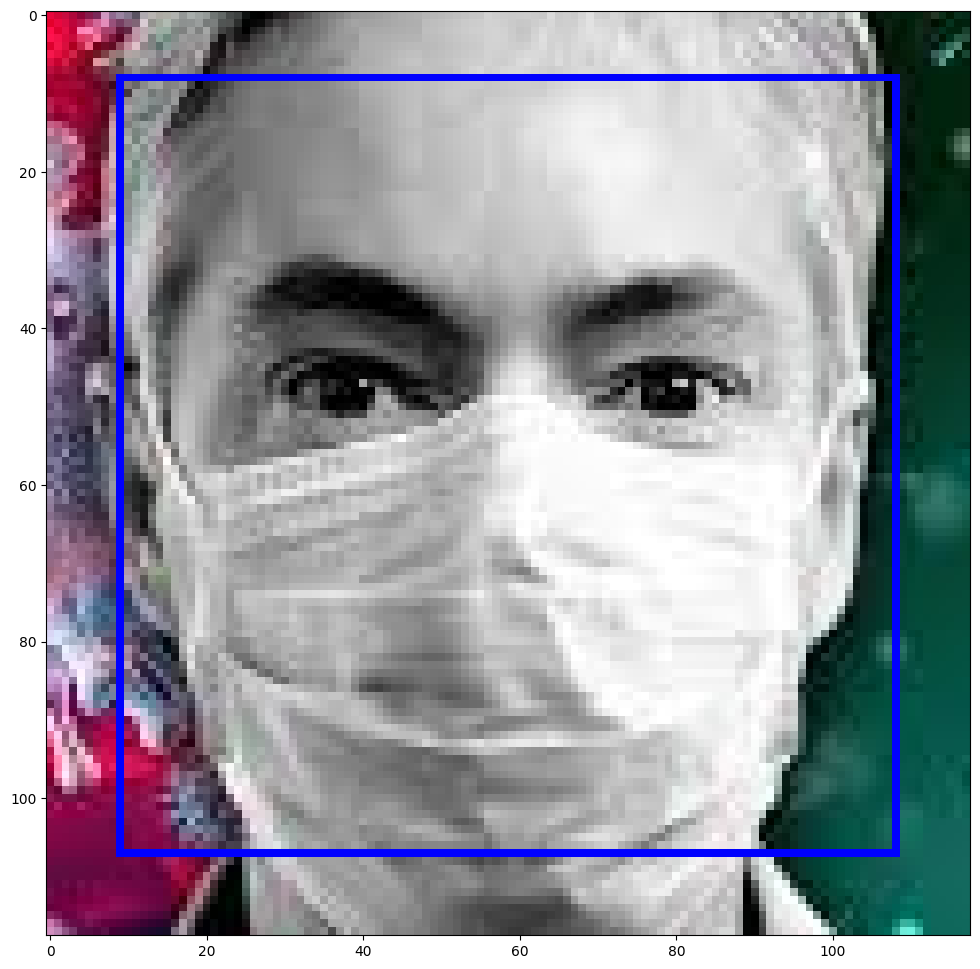

In [ ]:
img = cv2.imread('/content/Face Mask Dataset/Train/WithMask/1045.png')
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

Import keras modules

In [ ]:
# VGG-19 is a convolutional neural network that
# is 19 layers deep. You can load a pretrained
# version of the network trained on more than
# a million images from the ImageNet database.
# The pretrained network can classify images into
# 1000 object categories.

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Define dataset path

In [ ]:
train_data = "/content/Face Mask Dataset/Train"
test_data = "/content/Face Mask Dataset/Test"
val_data = "/content/Face Mask Dataset/Validation"

In [ ]:
# ImageDataGenerator is used to take the inputs
# of the original data and then transform
# it on a random basis, returning the output
# resultant containing solely the newly changed data.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_data,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_data,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_data,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
x, y = next(train_generator)

In [ ]:
X = train_generator.class_indices
classes = list(X.keys())
classes

['WithMask', 'WithoutMask']

In [ ]:
plt.figure(figsize=(20,10))
# for image, labels in next(train_generator):
def plot_img(image, labels):
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(image[i])
    plt.title(classes[np.argmax(labels[i])], fontsize = 5.5)
    plt.axis("off")
plt.show()

<Figure size 2000x1000 with 0 Axes>

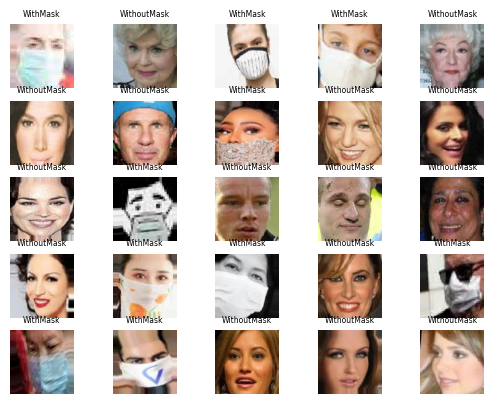

In [ ]:
plot_img(x, y)

In [ ]:
len(train_generator)

313

train my model using vgg19 architecture

In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit(train_generator, steps_per_epoch = len(train_generator)//32, epochs = 20, validation_data = val_generator, validation_steps = len(val_generator)//32)

Epoch 1/20
9/9 [==============================] - 65s 7s/step - loss: 0.5033 - accuracy: 0.7639
Epoch 2/20
9/9 [==============================] - 63s 7s/step - loss: 0.1981 - accuracy: 0.9410
Epoch 3/20
9/9 [==============================] - 63s 7s/step - loss: 0.1560 - accuracy: 0.9375
Epoch 4/20
9/9 [==============================] - 63s 7s/step - loss: 0.1859 - accuracy: 0.9201
Epoch 5/20
9/9 [==============================] - 63s 7s/step - loss: 0.0941 - accuracy: 0.9792
Epoch 6/20
9/9 [==============================] - 63s 7s/step - loss: 0.1031 - accuracy: 0.9514
Epoch 7/20
9/9 [==============================] - 63s 7s/step - loss: 0.1073 - accuracy: 0.9757
Epoch 8/20
9/9 [==============================] - 62s 7s/step - loss: 0.0927 - accuracy: 0.9688
Epoch 9/20
9/9 [==============================] - 63s 7s/step - loss: 0.0991 - accuracy: 0.9583
Epoch 10/20
9/9 [==============================] - 62s 7s/step - loss: 0.0716 - accuracy: 0.9757
Epoch 11/20
9/9 [======================

In [ ]:
# Evaluate my model

In [ ]:
model.evaluate(test_generator)

31/31 [==============================] - 215s 7s/step - loss: 0.0583 - accuracy: 0.9778


[0.058333396911621094, 0.9778226017951965]

Predict my model

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [ ]:
img  = cv2.imread("/content/images/maksssksksss244.png")
faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

In [ ]:
MIN_DISTANCE = 130

1/1 [==============================] - 0s 422ms/step


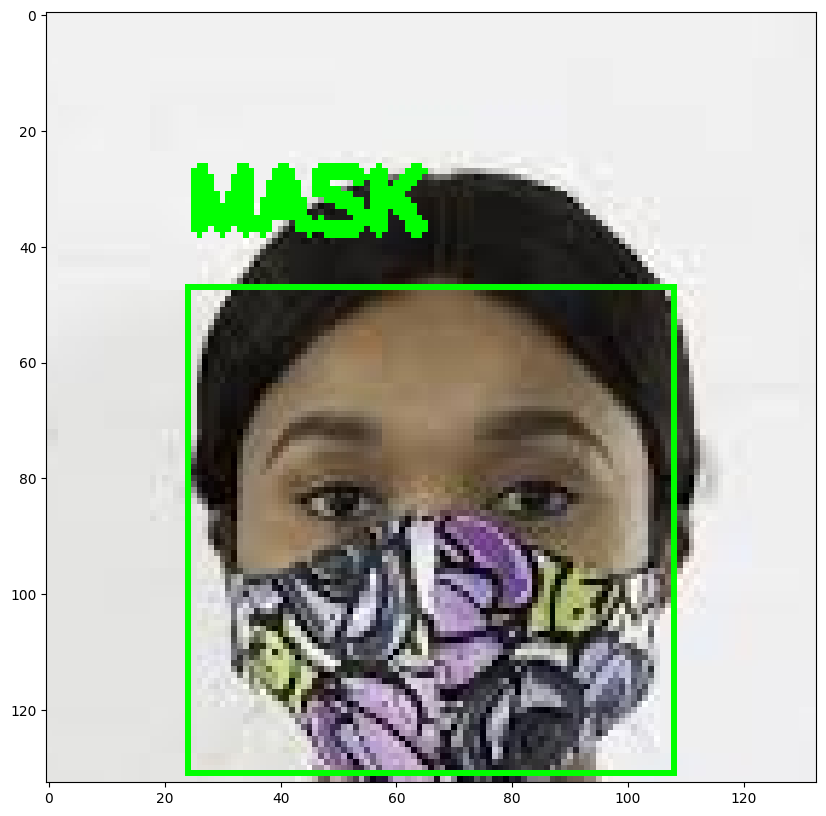

In [ ]:
label = [0 for i in range(len(faces))]
for i in range(len(faces)-1):
  for j in range(i+1, len(faces)):
    dist = distance.euclidean(faces[i][:2], faces[j][:2])
    if dist<MIN_DISTANCE:
      label[i] = 1
      label[j] = 1
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
for i in range(len(faces)):
  (x,y,w,h) = faces[i]
  crop = new_img[y:y+h,x:x+w]
  crop = cv2.resize(crop,(128,128))
  crop = np.reshape(crop,[1,128,128,3])/255.0
  mask_result = model.predict(crop)
  cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)        
  cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
plt.figure(figsize=(10,10))
plt.imshow(new_img)

predict my model using new data

In [ ]:
# New_data_path = "https://www.kaggle.com/datasets/andrewmvd/face-mask-detection"

1/1 [==============================] - 0s 218ms/step


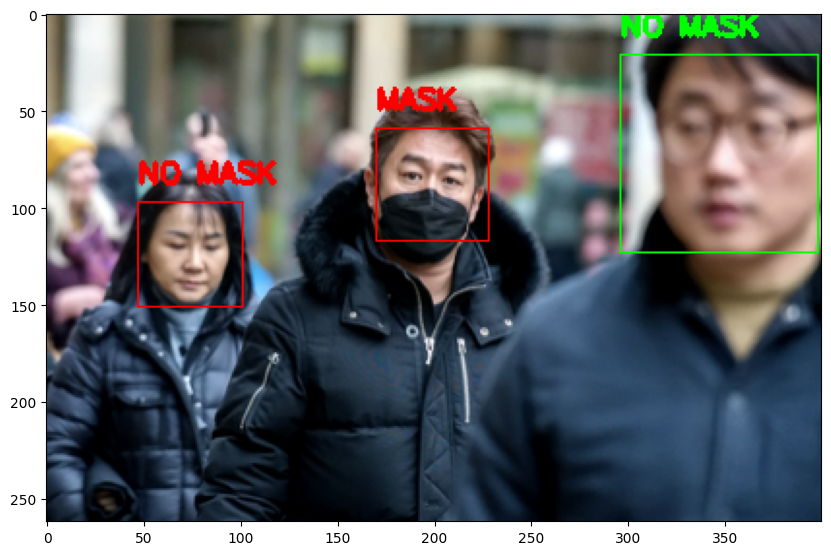

In [ ]:
label = [0 for i in range(len(faces))]
for i in range(len(faces)-1):
  for j in range(i+1, len(faces)):
    dist = distance.euclidean(faces[i][:2], faces[j][:2])
    if dist<MIN_DISTANCE:
      label[i] = 1
      label[j] = 1
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
for i in range(len(faces)):
  (x,y,w,h) = faces[i]
  crop = new_img[y:y+h,x:x+w]
  crop = cv2.resize(crop,(128,128))
  crop = np.reshape(crop,[1,128,128,3])/255.0
  mask_result = model.predict(crop)
  cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)        
  cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
plt.figure(figsize=(10,10))
plt.imshow(new_img)